In [1]:
import numpy
import py_monte_carlo
from matplotlib import pyplot

In [2]:
def make_lattice(xsidelen=2, ysidelen=2):
    x = numpy.arange(xsidelen)
    y = numpy.arange(ysidelen)
    n = numpy.arange(4)
    X, Y, N = numpy.meshgrid(x, y, n)

    INDX = Y*len(x)*len(n) + X*len(n) + N
    SQR_BONDS = Y*len(x)*len(n) + X*len(n) + (N + 1)%len(n)

    edges = [((a, b), 1 if a%len(n) == 0 and b%len(n) == 1 else -1) 
             for a,b in zip(INDX.flatten(), SQR_BONDS.flatten())]
    
    for (sx, sy, sn) in zip(X.flatten(), Y.flatten(), N.flatten()):
        if sn == 1:
            a = sy*len(x)*len(n) + sx*len(n) + 1
            b = sy*len(x)*len(n) + ((sx+1)%len(x))*len(n) + 3
            edges.append(((a,b), -1))
        if sn == 0:
            a = sy*len(x)*len(n) + sx*len(n) + 0
            b = ((sy+1)%len(y))*len(x)*len(n) + sx*len(n) + 2
            edges.append(((a,b), -1))
    
    return edges

def get_cart(a, xsidelen=2, ysidelen=2, inner_size=0.1):
    y = a//(xsidelen*4)
    x = (a//4)%ysidelen
    rel = a % 4
    if rel == 0:
        return (x, y+inner_size)
    if rel == 1:
        return (x+inner_size, y)
    if rel == 2:
        return (x, y-inner_size)
    if rel == 3:
        return (x-inner_size, y)

In [3]:
edges = make_lattice(4, 4)

## Edit Gamma

In [4]:
gammas = [1.0, 0.5, 0.1, 0.05]

/Users/sumner/.virtualenvs/dwave/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


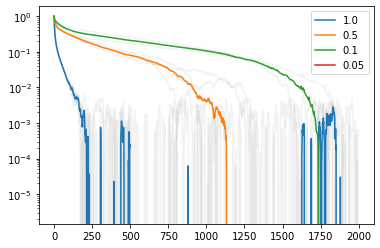

In [5]:
beta = 2.0
l = py_monte_carlo.Lattice(edges)
for gamma in gammas:
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(beta, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:2000], alpha=0.1, c='gray')
    pyplot.plot(numpy.nanmean(autocorrs[:,:2000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()

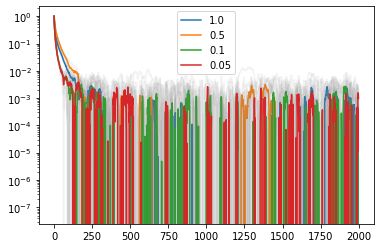

In [6]:
l = py_monte_carlo.Lattice(edges)
l.set_enable_semiclassical_update(True)
for gamma in gammas:
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(beta, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:2000], alpha=0.1, c='gray')
    pyplot.plot(numpy.nanmean(autocorrs[:,:2000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()

$\beta = 10$

/Users/sumner/.virtualenvs/dwave/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


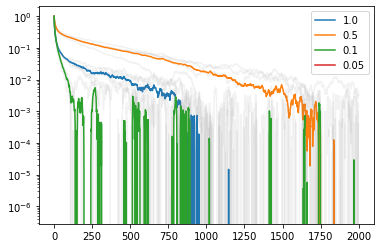

In [7]:
beta = 10.0
l = py_monte_carlo.Lattice(edges)
l.set_enable_semiclassical_update(True)
for gamma in gammas:
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(beta, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:2000], alpha=0.1, c='gray')
    pyplot.plot(numpy.nanmean(autocorrs[:,:2000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()